# LMS 12. 딥러닝 프로젝트
# 2024. 8. 6
# 12:3 ~ 17:30
# 구태훈

* 12-2. Boston 주택 가격 예측 모델

In [22]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [23]:
# 데이터 로드 및 전처리
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [24]:
import numpy as np
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = np.mean(train_data, axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = np.std(train_data, axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

In [25]:
# 모델 구성 및 컴파일
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
model = models.Sequential()

# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 첫 번째 Dense 레이어, 입력 데이터의 shape을 지정
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))

# 두 번째 Dense 레이어
model.add(layers.Dense(64, activation='relu'))

# 출력 레이어, 회귀 문제이므로 활성화 함수는 없음
model.add(layers.Dense(1))

# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# 모델을 컴파일
model.compile(optimizer='rmsprop',
              loss='mse', # 평균 제곱 오차 (mean squared error)
              metrics=['mae']) # 평균 절대 오차 (mean absolute error)

# 모델 요약 정보 출력
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 모델 학습
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
epochs = 100
batch_size = 16

# 모델 학습
history = model.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(test_data, test_labels))

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 473.1146 - mae: 20.0085 - val_loss: 417.8661 - val_mae: 18.3536
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 371.7918 - mae: 17.1108 - val_loss: 234.6020 - val_mae: 13.0113
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 204.6665 - mae: 11.6470 - val_loss: 110.5828 - val_mae: 8.5112
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.2035 - mae: 6.7593 - val_loss: 58.7429 - val_mae: 5.9924
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.4369 - mae: 4.8722 - val_loss: 39.7360 - val_mae: 4.9638
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.9327 - mae: 4.0501 - val_loss: 31.3065 - val_mae: 4.3893
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.7858 - mae: 3.2336 - val_loss: 26.4817 - val_mae: 3.9950
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.1418 - mae: 3.1901 - val_loss: 23.8762 - val_mae: 3.6970
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━

<ipython-input-27-9ee2abdddcb1>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


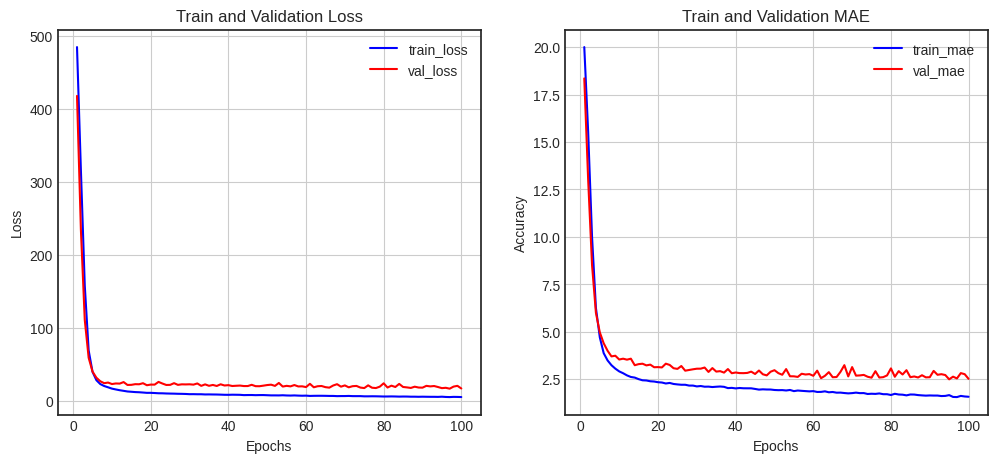

In [27]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [28]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae = model.evaluate(test_data, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.5652 - mae: 2.3346
Test Loss: 16.60637092590332
Test MAE: 2.5126733779907227


* 회고
 * 학습과 다르게 테스트에서는 값이 많이 떨어집니다.
 * MSE(loss)값이 17.4471인 것은 주택 가격 예측에서 평균적으로 $17,447.1의 제곱오차를 나타냅니다.

 * MAE값이 2.73인 것은 모델의 예측값과 실제 주택 가격 사이에 평균적으로 $2,730의 차이가 있는 것을 알 수 있습니다.

# 12-3. Reuters 딥러닝 모델


In [29]:
# 데이터 로드 및 전처리
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [30]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터셋을 훈련 데이터와 검증 데이터로 분리
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [31]:
from tensorflow.keras.utils import to_categorical
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, sequence in enumerate(data):
    results[i, sequence] = 1.0
  return results

# 텍스트 데이터 원-핫 인코딩
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들을 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

In [41]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()

# 첫 번째 Dense 레이어
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization()) # BatchNormalization 적용
model.add(layers.Dropout(0.5)) # Dropout 적용

# 두 번째 Dense 레이어
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization()) # BatchNormalization 적용
model.add(layers.Dropout(0.5)) # Dropout 적용

# 출력 레이어 - 46개의 클래스 이므로 46개의 유닛과 softmax 활성화 함수 사용
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 647,726 (2.47 MB)

 Trainable params: 647,470 (2.47 MB)

 Non-trainable params: 256 (1.00 KB)

In [43]:
from tensorflow.keras import callbacks
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

# 콜백 설정
checkpoint_cb = callbacks.ModelCheckpoint(filepath='reuters_model.keras',
                                          monitor='val_loss',
                                          save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.1310 - loss: 4.1152 - val_accuracy: 0.5637 - val_loss: 3.5499
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.4572 - loss: 2.6011 - val_accuracy: 0.6545 - val_loss: 3.1773
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.6082 - loss: 1.9110 - val_accuracy: 0.6848 - val_loss: 2.8231
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.6766 - loss: 1.5730 - val_accuracy: 0.7061 - val_loss: 2.5214
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7138 - loss: 1.3474 - val_accuracy: 0.7061 - val_loss: 2.2894
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7424 - loss: 1.1982 - val_accuracy: 0.7088 - val_loss: 2.1003
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7672 - loss: 1.0698 - val_accuracy: 0.7039 - val_loss: 1.9366
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7870 - loss: 0.9922 - val_accuracy: 0.7079 

<ipython-input-44-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


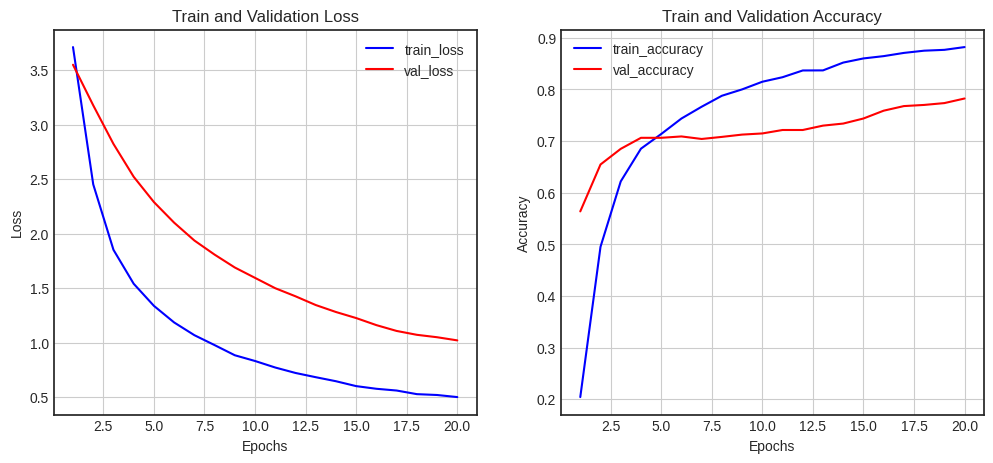

In [44]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [45]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.

# 테스트 데이터셋을 이용한 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7744 - loss: 1.0692
Test Loss: 1.0798625946044922
Test Accuracy: 0.7640249133110046


* 회고
 * Test Loss 가 1.079가 나왔습니다.
 * 테스트 데이터의 예측 오류 값입니다.
 * categorical_crossentropy' 손실 함수에 의한 값입니다.

 * Accuracy 값이 0.764가 나왔습니다.
 * 다중 클래스 분류에서 46개 뉴스 카테고리 중에 하나를 예측할 때 77.4% 확률로 맞춥니다.

# 12-4. CIFAR10 딥러닝 모델

In [46]:
# 데이터 로드 및 전처리
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [47]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

# cifar10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋의 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [48]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-50-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


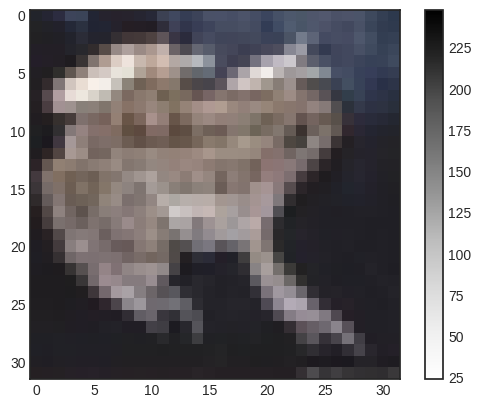

In [50]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [51]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [52]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_val = x_val.reshape(x_val.shape[0], 32 * 32 * 3)
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

# 변형된 데이터의 형태를 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [53]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [55]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

model = models.Sequential()

# 첫 번째 Dense 레이어
model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())  # BatchNormalization 적용
model.add(layers.Dropout(0.5)) # Dropout 적용

# 두 번째 Dense 레이어
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization()) # BatchNormalization 적용
model.add(layers.Dropout(0.5)) # Dropout 적용

# 세 번째 Dense 레이어
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization()) # BatchNormalization 적용
model.add(layers.Dropout(0.5)) # Dropout 적용

# 출력 레이어 - 10개의 클래스이므로 10개의 유닛과 softmax 활성화 함수 사용
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

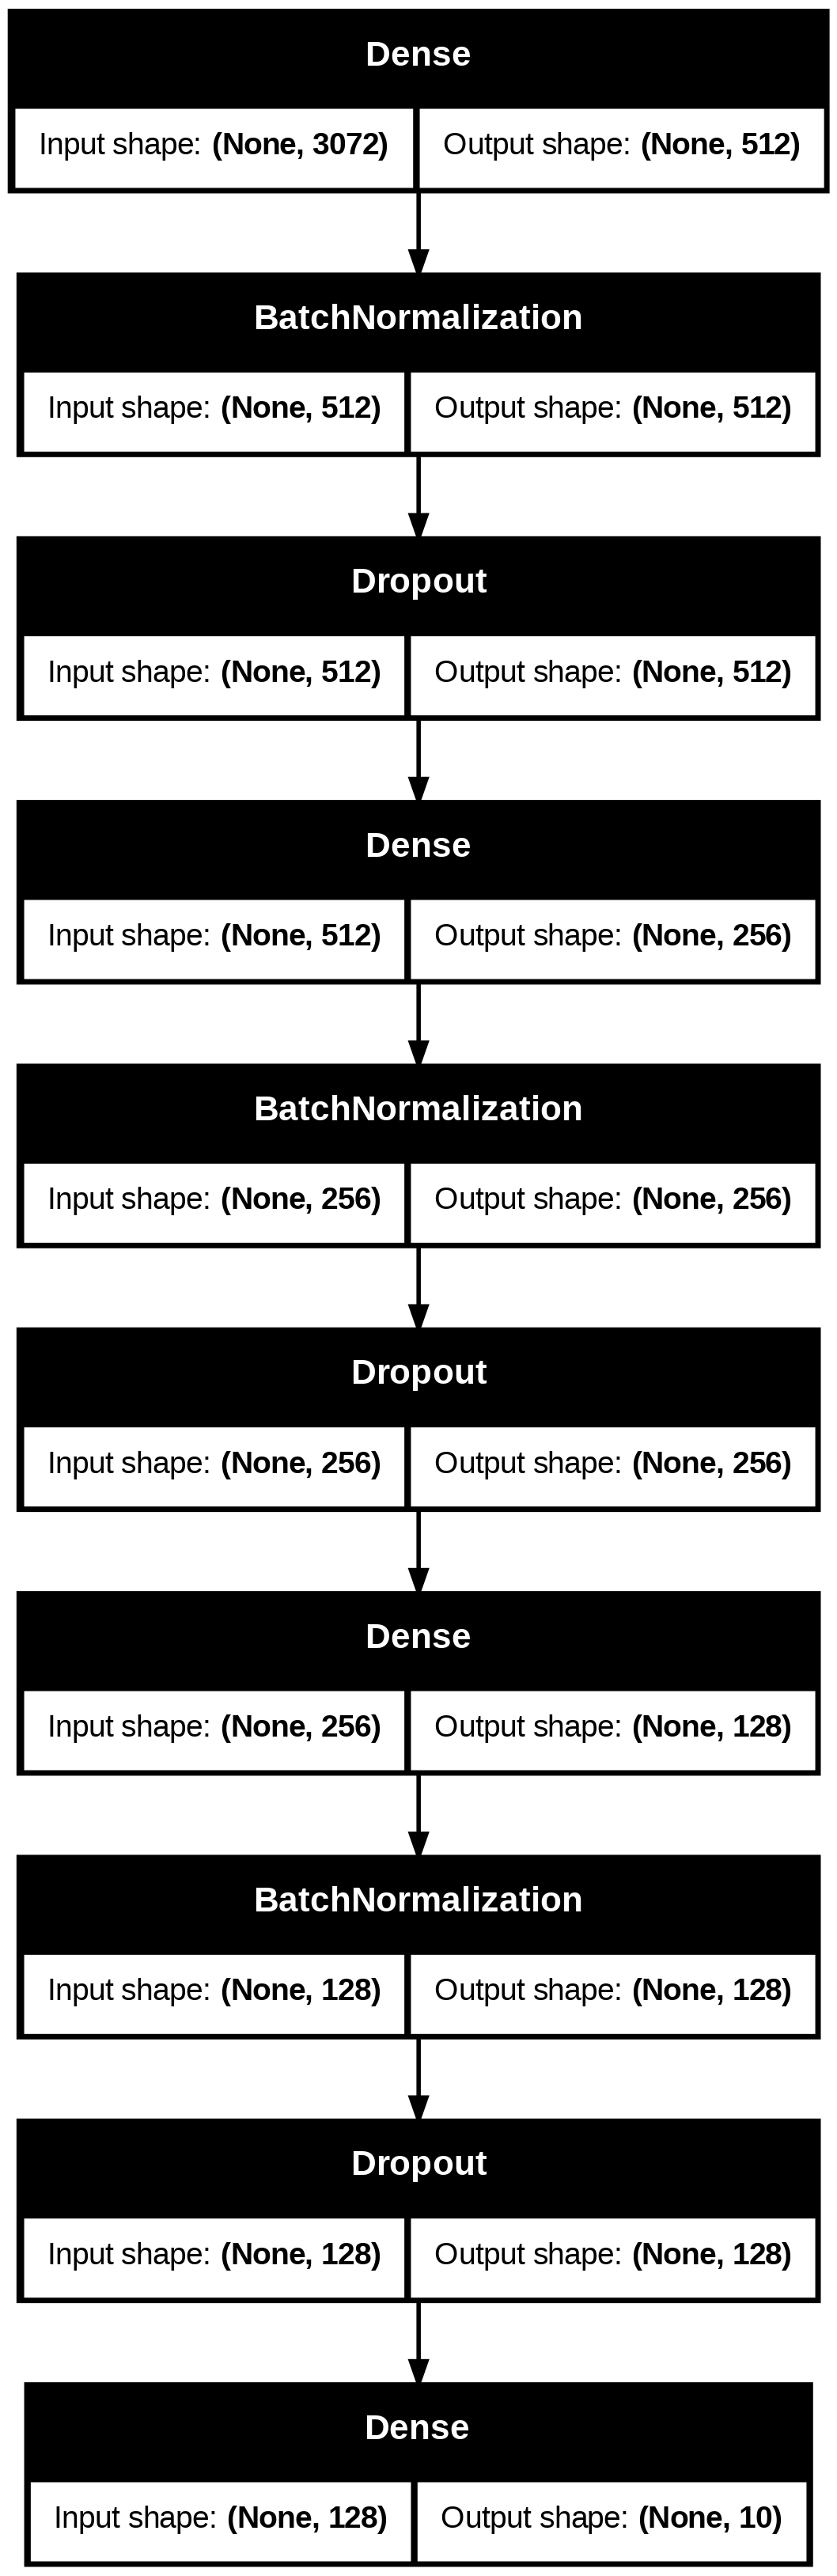

In [59]:
utils.plot_model(model, show_shapes=True)

In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

# 콜백 설정
checkpoint_cb = ModelCheckpoint(filepath='cifar10_model.keras',
                                 monitor='val_loss',
                                 save_best_only=True)

early_stopping_cb = EarlyStopping(monitor='val_loss',
                                  patience=5,
                                  restore_best_weights=True)

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.3525 - loss: 1.8006 - val_accuracy: 0.3943 - val_loss: 1.6854
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.3609 - loss: 1.7807 - val_accuracy: 0.3701 - val_loss: 1.7496
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.3509 - loss: 1.8062 - val_accuracy: 0.3878 - val_loss: 1.6981
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - accuracy: 0.3546 - loss: 1.7975 - val_accuracy: 0.3824 - val_loss: 1.7242
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.3553 - loss: 1.7967 - val_accuracy: 0.3928 - val_loss: 1.6767
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.3536 - loss: 1.7874 - val_accuracy: 0.4023 - val_loss: 1.6670
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.3669 - loss: 1.7689 - val_accuracy: 0.3936 - val_loss: 1.6909
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.3675 - loss: 1.7525 - 

* 코랩에서 Epoch 수행시간이 느려서 LMS의 데이터로 대체합니다.


Epoch 1/30
625/625 [==============================] - 3s 4ms/step - loss: 1.7718 - accuracy: 0.3652 - val_loss: 1.6304 - val_accuracy: 0.4111

Epoch 2/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7603 - accuracy: 0.3655 - val_loss: 1.6388 - val_accuracy: 0.4016

Epoch 3/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7569 - accuracy: 0.3683 - val_loss: 1.6284 - val_accuracy: 0.4086

Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7476 - accuracy: 0.3733 - val_loss: 1.6208 - val_accuracy: 0.4202

Epoch 5/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7333 - accuracy: 0.3763 - val_loss: 1.6278 - val_accuracy: 0.4131

Epoch 6/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7364 - accuracy: 0.3756 - val_loss: 1.6853 - val_accuracy: 0.3996

Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 1.7313 - accuracy: 0.3813 - val_loss: 1.6111 - val_accuracy: 0.4152

Epoch 8/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7255 - accuracy: 0.3814 - val_loss: 1.6121 - val_accuracy: 0.4154

Epoch 9/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7257 - accuracy: 0.3841 - val_loss: 1.5731 - val_accuracy: 0.4424

Epoch 10/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7241 - accuracy: 0.3844 - val_loss: 1.5922 - val_accuracy: 0.4289

Epoch 11/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7245 - accuracy: 0.3821 - val_loss: 1.5755 - val_accuracy: 0.4360

Epoch 12/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7110 - accuracy: 0.3865 - val_loss: 1.6171 - val_accuracy: 0.4262

Epoch 13/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7157 - accuracy: 0.3864 - val_loss: 1.6020 - val_accuracy: 0.4203

Epoch 14/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7161 - accuracy: 0.3877 - val_loss: 1.5956 - val_accuracy: 0.4294

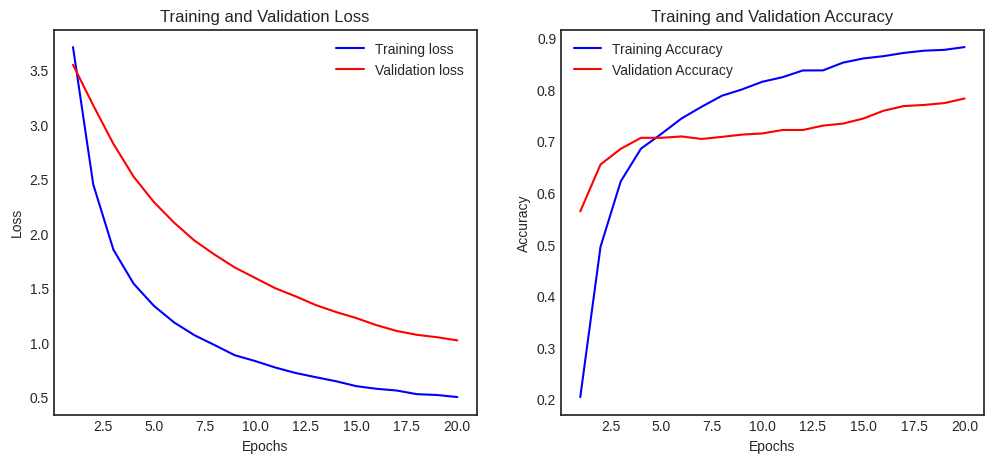

In [64]:
# 문제 3-5: 학습 히스토리의 'loss', 'val_loss', 'accuracy', 'val_accuracy'를 차트로 시각화 합니다.

# 학습 히스토리로부터 데이터를 가져옵니다.
history_dic = history.history

# 손실 값 시각화 (loss)
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# 정확도 시각화 (accuracy)
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

# 손실 값 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1,2,2)
plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [65]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4118 - loss: 1.6300


[1.6348915100097656, 0.4090000092983246]

* 회고
 * 학습 시간이 코랩에서 25~46초가 걸렸고, 주피터 노트북에서 2초가 걸려서 결과를 가져왔습니다. 14번째에 얼리 스탑되었습니다.
 * 학습 loss 1.5956, 학습 정밀도 0.4294가 나왔습니다.
 * 테스트 loss 1.63, 테스트 정밀도 0.4118이 나왔습니다.
 * 간단한 Dense 레이어를 사용한 점이 낮은 성능을 낸 것으로 보입니다.
 * 복잡한 모델을 사용하면 좋은 성능을 낼 것으로 예상됩니다.